In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
data = pd.read_csv('spotify_data.csv')

data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
train, test = train_test_split(data, test_size =0.25)

In [ ]:
train.shape

(1512, 17)

In [ ]:
test.shape

(505, 17)

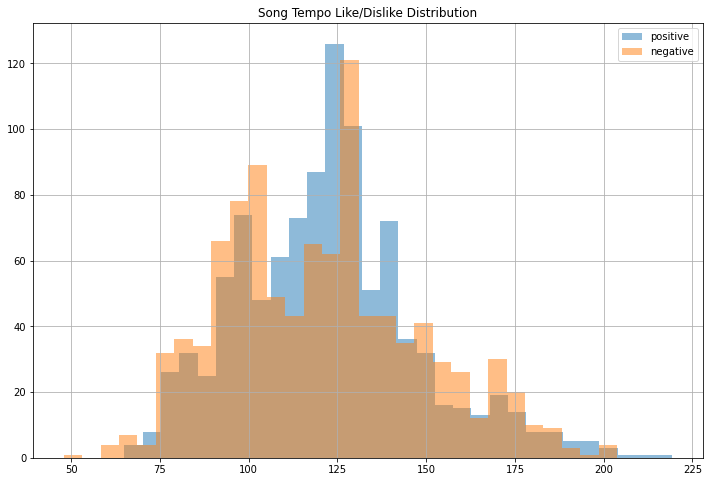

In [ ]:
pos_tempo = data[data['target']==1]['tempo']
neg_tempo = data[data['target']==0]['tempo']
fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like/Dislike Distribution")
pos_tempo.hist(alpha = 0.5, bins = 30, label = "positive")
neg_tempo.hist(alpha = 0.5, bins = 30, label = "negative")
plt.legend(loc="upper right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

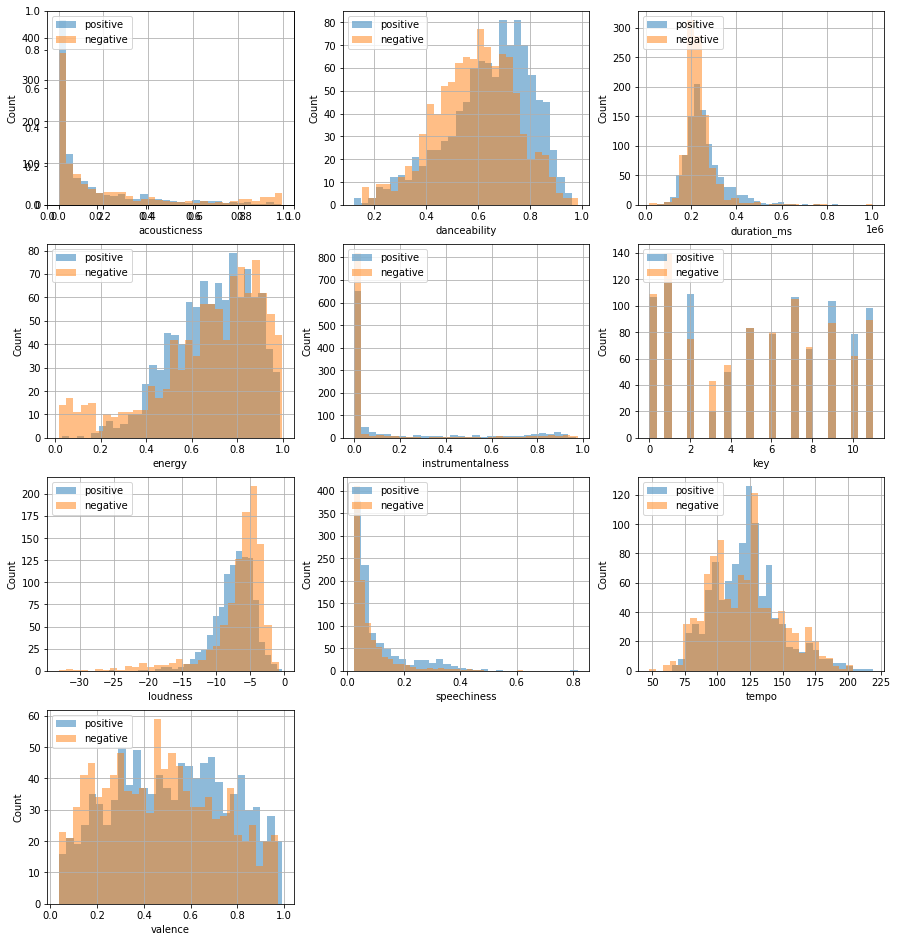

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))

c = 1
for idx, (colName, ax)  in enumerate(list(zip(data.columns, axes.flatten()))):
    features = ['tempo', 'danceability', 'duration_ms', 
                'loudness', 'speechiness', 'valence', 
                'energy', 'acousticness', 'key', 'instrumentalness']
    if colName in features:
        
        pos = data[data['target'] == 1][colName]
        neg = data[data['target'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName)
        ax.set_ylabel('Count')
        ax.set_title="{} Like/Dislike Distribution".format(colName)
        
        pos.hist(alpha = 0.5, bins=30, label='positive')
        
        ax = fig.add_subplot(6, 3, c)
        neg.hist(alpha = 0.5, bins=30, label='negative')
        ax.legend(loc='upper left')
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

In [ ]:
c1 = DecisionTreeClassifier(min_samples_split=100)
c2 = DecisionTreeClassifier(min_samples_split=10)

In [ ]:
features = ['tempo', 'danceability', 'duration_ms', 
            'loudness', 'speechiness', 'valence', 
            'energy', 'acousticness', 'key', 
            'instrumentalness'] 

In [ ]:
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

In [ ]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [ ]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [ ]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

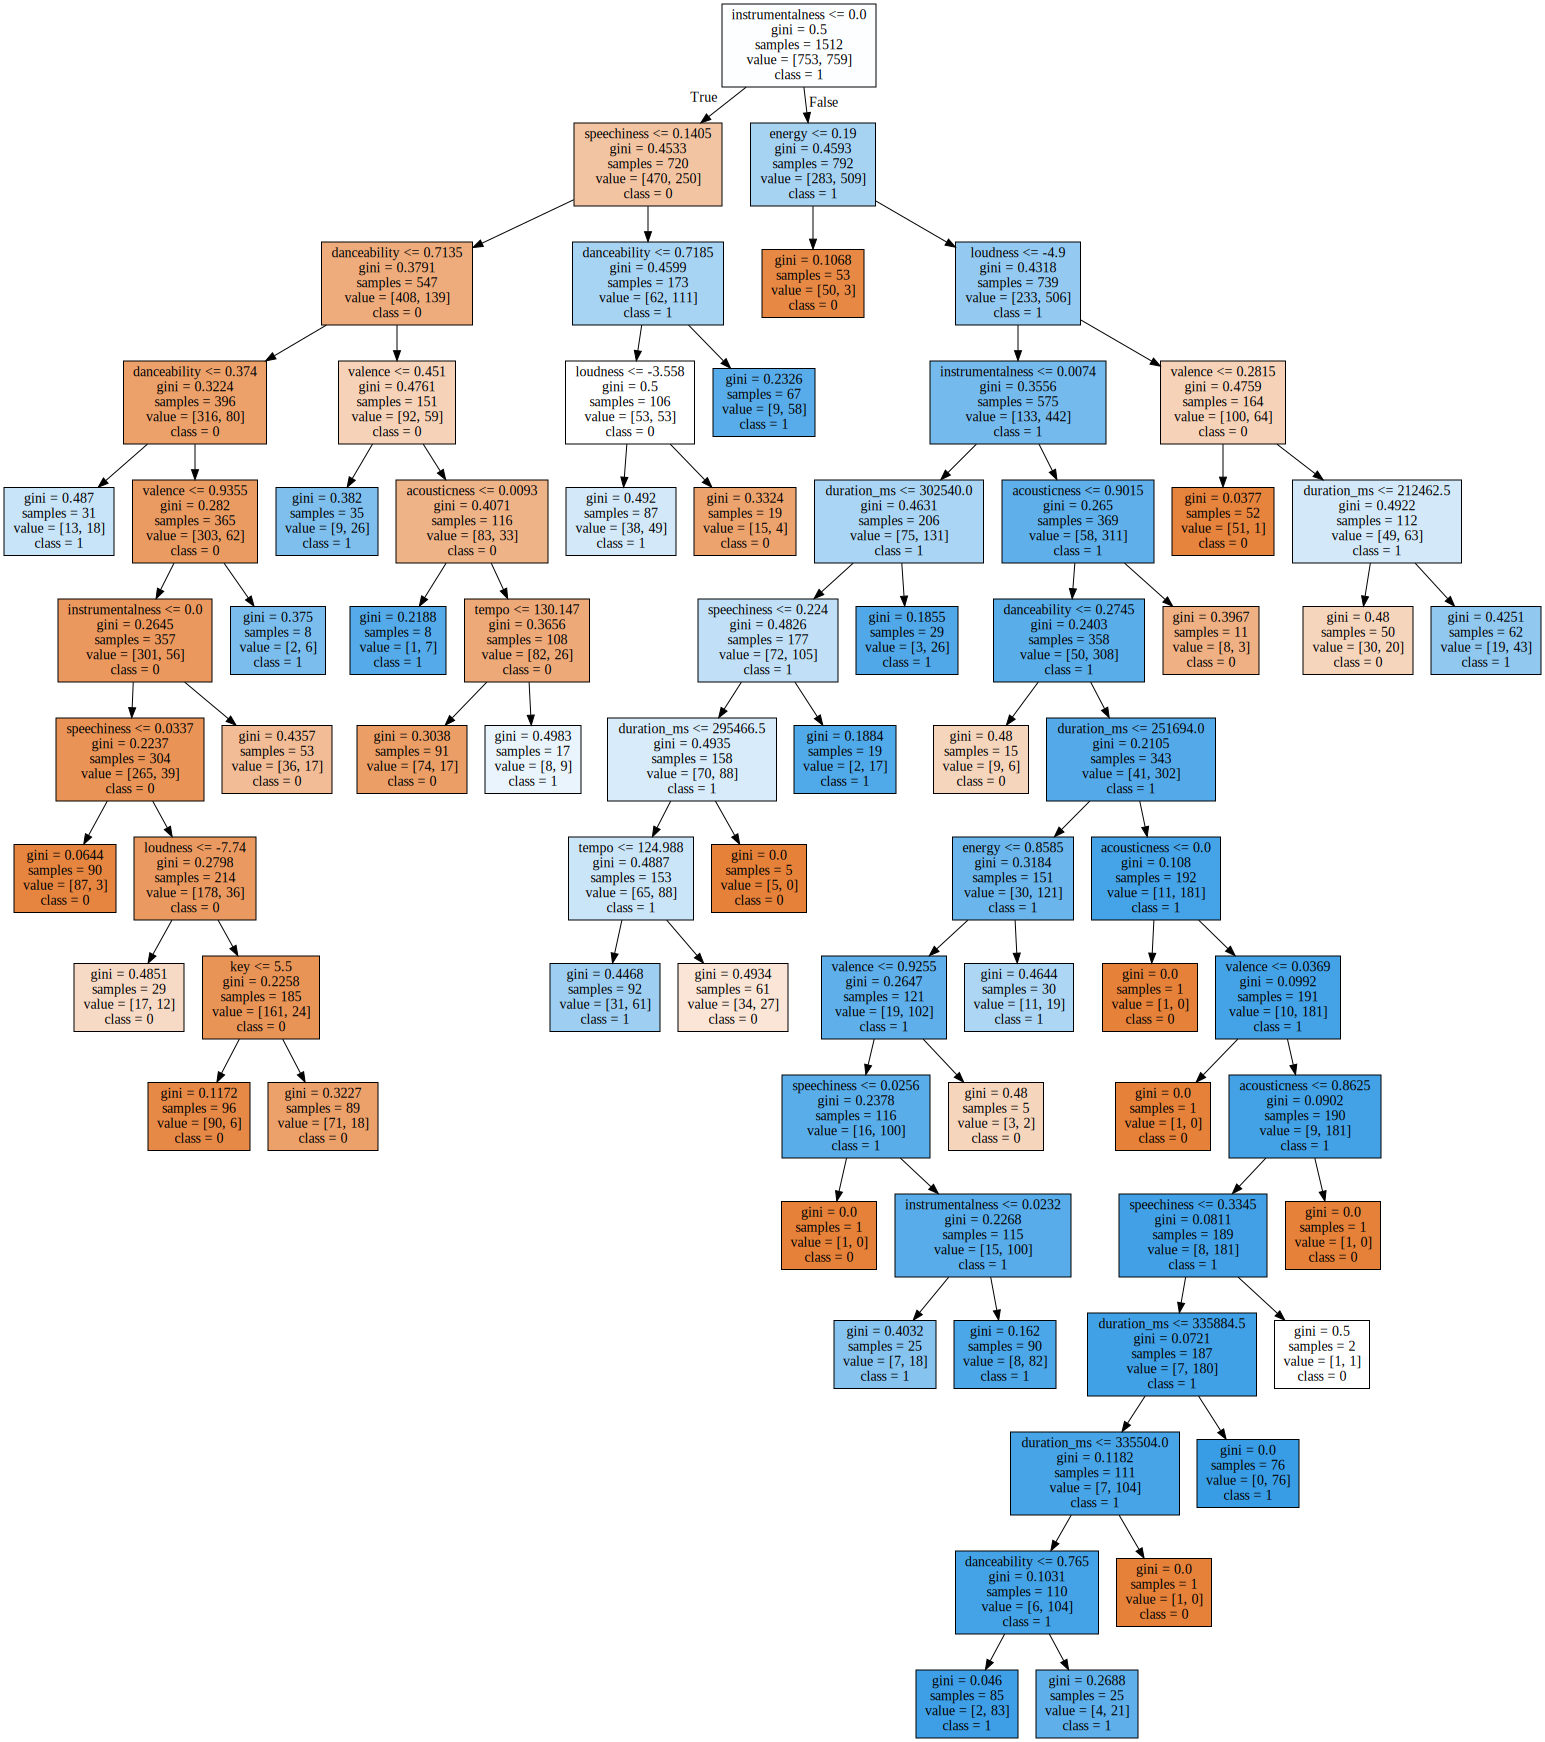

In [ ]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

79.6957671957672

In [ ]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

92.85714285714286

In [ ]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

71.28712871287128

In [ ]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

67.52475247524752

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       244
           1       0.71      0.75      0.73       261

    accuracy                           0.71       505
   macro avg       0.71      0.71      0.71       505
weighted avg       0.71      0.71      0.71       505



In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       244
           1       0.68      0.69      0.69       261

    accuracy                           0.68       505
   macro avg       0.67      0.67      0.67       505
weighted avg       0.68      0.68      0.68       505



In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[164,  80],
       [ 65, 196]])

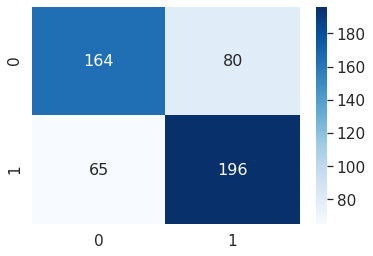

In [ ]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[161,  83],
       [ 81, 180]])

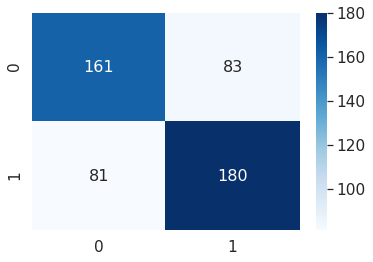

In [ ]:
df_cm2 = pd.DataFrame(cm2, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm2, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score

In [ ]:
model1 = tree1.predict_proba(X_train)
model1

array([[0.43678161, 0.56321839],
       [0.43678161, 0.56321839],
       [0.79775281, 0.20224719],
       ...,
       [0.9375    , 0.0625    ],
       [0.        , 1.        ],
       [0.33695652, 0.66304348]])

In [ ]:
model2 = tree2.predict_proba(X_train)
model2

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [ ]:
#Plot AUC-ROC
fpr1, tpr1, threshold1 = roc_curve(y_train, model1[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_train, model2[:,1])
roc_auc2 = auc(fpr2, tpr2)

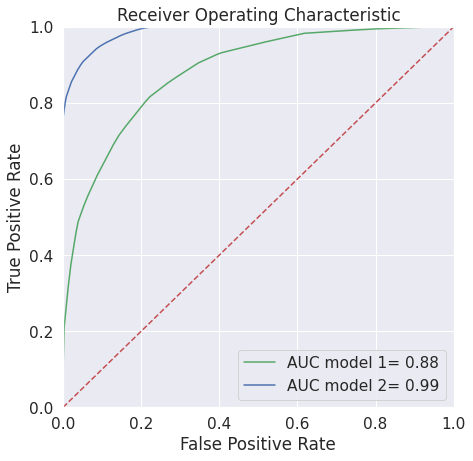

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
model1_test = tree1.predict_proba(X_test)
model1_test

array([[0.33695652, 0.66304348],
       [0.08888889, 0.91111111],
       [0.79775281, 0.20224719],
       ...,
       [0.9375    , 0.0625    ],
       [0.6       , 0.4       ],
       [0.        , 1.        ]])

In [ ]:
model2_test = tree2.predict_proba(X_test)
model2_test

array([[0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.25, 0.75],
       ...,
       [1.  , 0.  ],
       [0.6 , 0.4 ],
       [0.  , 1.  ]])

In [ ]:
#Plot AUC-ROC
fpr1, tpr1, threshold1 = roc_curve(y_test, model1_test[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, model2_test[:,1])
roc_auc2 = auc(fpr2, tpr2)

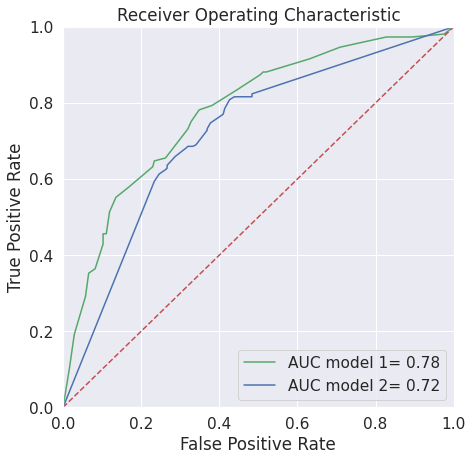

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
!pip install scikit-plot

<Figure size 504x504 with 0 Axes>

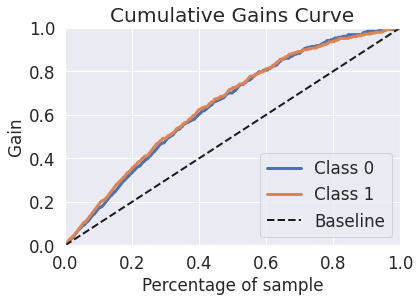

In [ ]:
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, model1_test)
plt.show()

<Figure size 504x504 with 0 Axes>

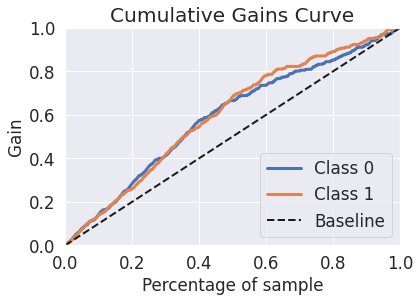

In [ ]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, model2_test)
plt.show()

In [ ]:
#Build Random Forest model
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf1_model_pred = rf1.predict(X_test)

In [ ]:
test_score_rf = accuracy_score(y_test, rf1_model_pred)*100
test_score_rf

75.24752475247524

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       257
           1       0.73      0.79      0.76       248

    accuracy                           0.75       505
   macro avg       0.75      0.75      0.75       505
weighted avg       0.75      0.75      0.75       505



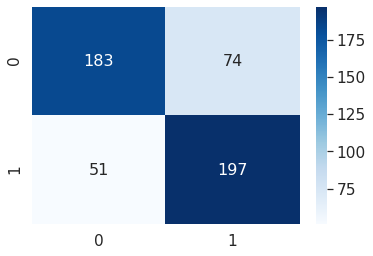

In [ ]:
print(classification_report(y_test, rf1_model_pred))
rf_cm = confusion_matrix(y_test, rf1_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

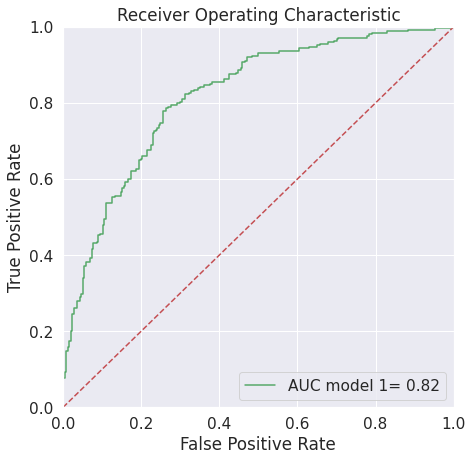

In [ ]:
rf_model1_test = rf1.predict_proba(X_test)

#Plot AUC-ROC
fpr1, tpr1, threshold1 = roc_curve(y_test, rf_model1_test[:,1])
roc_auc1 = auc(fpr1, tpr1)
#fpr2, tpr2, threshold2 = roc_curve(y_test, rf_model2_test[:,1])
#roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
#plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn import svm

In [ ]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [ ]:
model_svm = svmf.fit(X_train, y_train)

In [ ]:
pred_svm = model_svm.predict(X_test)

In [ ]:
test_score_svm = accuracy_score(y_test, pred_svm)*100
test_score_svm

57.821782178217816

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gdtree = DecisionTreeClassifier()

In [ ]:
param_dict ={ 
    "criterion": ['gini', 'entropy'], 
    "min_samples_split":range(2,100)
    }

In [ ]:
grid =GridSearchCV(gdtree,param_grid=param_dict, cv=10)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 96}

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 94}

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 61}

In [ ]:
grid.best_score_

0.7274976504272945

In [ ]:
grid.best_score_

0.7314700243987452

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
gt1=DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=96)

In [ ]:
gt_fit = gt1.fit(X_train, y_train)
gt_p1 = gt1.predict(X_train)

In [ ]:
gtrain_score = accuracy_score(y_train, gt_p1)*100
gtrain_score

78.96825396825396

In [ ]:
gt1=DecisionTreeClassifier(
    criterion='entropy',
    min_samples_leaf= 2,
    min_samples_split=96)
gt_fit = gt1.fit(X_train, y_train)
gt_p1 = gt1.predict(X_train)
gtrain_score = accuracy_score(y_train, gt_p1)*100
gtrain_score

78.96825396825396

In [ ]:
gt1=DecisionTreeClassifier(
    criterion='entropy',
    min_samples_leaf= 2,
    min_samples_split=61)
gt_fit = gt1.fit(X_train, y_train)
gt_p1 = gt1.predict(X_train)
gtrain_score = accuracy_score(y_train, gt_p1)*100
gtrain_score

81.87830687830689

In [ ]:
gt_pt1 = gt1.predict(X_test)
gtest_score = accuracy_score(y_test, gt_pt1)*100
gtest_score

69.5049504950495